In [2]:
# Set up, diambil dari 04_training_linear_models.ipynb

In [3]:
import sklearn
import math
import numpy
import pandas as pd

In [4]:
#simple ML
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
# Import training data from csv and cleaning the data
training_data = pd.read_csv('el4233-2018-2019-02-01-training.csv', names = ['x','y'])
test_data = pd.read_csv('el4233-2018-2019-02-01-test.csv',names = ['index','x'])

# split to x and y
training_x = training_data.drop(['y'], axis=1)
training_y = training_data['y']

# Make training and validation data
valid_x = training_x [799:1000]
valid_y = training_y [799:1000]
training_x = training_x [0:800]
training_y = training_y [0:800]

#Clean Test_data
test_data = test_data.drop(['index'],axis=1)

#Checking the data
print(training_data)
print(test_data)

            x         y
0    0.360539 -1.790432
1    0.038950  0.745912
2    0.926437 -0.585759
3    1.449868 -0.569869
4    0.840407 -2.412565
5    0.970854 -0.440285
6    0.025562  0.592882
7    0.974743  0.199745
8    1.883613 -1.007853
9    1.701590  0.233468
10   1.459929  0.101995
11   0.217472  1.503574
12   1.787808  1.193271
13   1.714308  1.348063
14   0.330173 -0.870303
15   1.264668 -0.920761
16   0.040967  1.873501
17   0.233475  0.865656
18   0.632735  0.835648
19   0.315825 -1.154777
20   1.517959  0.160509
21   1.636551  0.850285
22   0.689249  0.322936
23   0.637598  1.162256
24   0.223322  1.314271
25   0.167906  2.074165
26   1.425452  0.087272
27   1.199087 -0.203360
28   0.111347  0.648798
29   0.959595 -0.228698
..        ...       ...
970  1.581237  1.680498
971  1.979703 -0.324692
972  0.495949 -0.309745
973  0.783114 -1.634726
974  0.968996 -0.824075
975  0.973949 -1.080997
976  0.471551 -1.014063
977  0.659609  1.416125
978  0.178571  1.707258
979  1.144471  0

<Figure size 432x288 with 0 Axes>

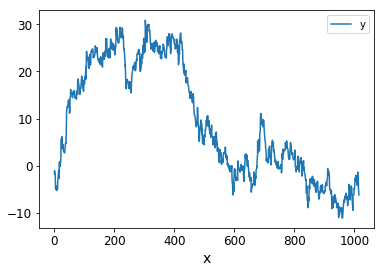

In [6]:
# reset plot
plt.close('all')

# show training dataset plot
pl=training_data.cumsum()
plt.figure()
pl.plot(x='x',y='y')


In [7]:
# Make an empty array (filled with 0) for mse
report_train_mse=np.zeros(40)
report_valid_mse=np.zeros(40)

In [8]:
#Preprocess modelling by transforming the polynom data to fit into linear regression model
derajat_polinom=23
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=derajat_polinom, include_bias=False)
train_x_poly = poly_features.fit_transform(training_x)
valid_x_poly = poly_features.fit_transform(valid_x)
test_x_poly = poly_features.fit_transform(test_data)

In [9]:
#Prepare model object with 'lin_reg' name
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [11]:
#Finding best model by fitting the training data using linear regression algorithm
lin_reg.fit(train_x_poly, training_y)

#Checking the result
lin_reg.intercept_, lin_reg.coef_

(-0.6024048092350134,
 array([ 1.00421142e+02, -2.96094678e+03,  4.62936793e+04, -4.06974697e+05,
         2.21887337e+06, -7.98950351e+06,  1.93392481e+07, -3.04556417e+07,
         2.67961008e+07, -2.37403670e+06, -2.19140678e+07,  1.79332090e+07,
         8.64240453e+06, -2.26507531e+07,  7.89888571e+06,  1.56172909e+07,
        -2.46393790e+07,  1.83320580e+07, -8.56909443e+06,  2.64872221e+06,
        -5.30054567e+05,  6.26096356e+04, -3.32924588e+03]))

In [12]:
# saving model
from sklearn.externals import joblib

joblib.dump(lin_reg, "Regresi_linear.pkl")

['Regresi_linear.pkl']

In [13]:
# Finding train using model
train_y_predict=lin_reg.predict(train_x_poly)

# Finding valid using model
valid_y_predict=lin_reg.predict(valid_x_poly)

In [15]:
# Finding solution using model

test_y_predict=lin_reg.predict(test_x_poly)

In [16]:
# Checking all the prediction data number 

train_y_predict.shape, test_y_predict.shape, valid_y_predict.shape

((800,), (2000,), (201,))

In [17]:
#MSE for training set

In [18]:
train_mse=sklearn.metrics.mean_squared_error(training_y, train_y_predict)

In [19]:
#MSE for validation set

In [20]:
valid_x_poly = poly_features.fit_transform(valid_x)
valid_y_predict=lin_reg.predict(valid_x_poly)

In [21]:
valid_mse=sklearn.metrics.mean_squared_error(valid_y, valid_y_predict)

In [22]:
# Input to arry
report_train_mse[derajat_polinom]=train_mse
report_valid_mse[derajat_polinom]=valid_mse

In [23]:
report_train_mse

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.25148723, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [24]:
report_valid_mse

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.24694847, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

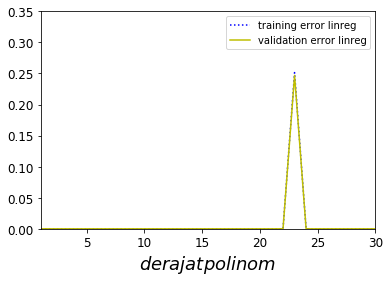

In [25]:
# validation vs training error, in terms of M
plt.plot(report_train_mse, "b:",label='training error linreg')

plt.plot(report_valid_mse, "y-",label='validation error linreg')

plt.axis([1, 30, 0,0.35])
plt.legend(loc='best')
#save_fig("simple_sin_error")
plt.xlabel("$derajat polinom$", fontsize=18)
plt.show()

In [26]:
# Append solution to dataframe
m = np.asarray(test_y_predict)
test_data['y']=m
test_data.to_csv('solution.csv')

## 